In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
plt.style.use('Solarize_Light2') 


## Predicting Average Food Prices

In [125]:
data=pd.read_excel("./data/madde sepeti ve ortalama madde fiyatlari (turkiye).xls")
food=data.iloc[5:133]
food


,Tüketici fiyat endeksi (2003=100) madde sepeti ve ortalama fiyatlar (Türkiye),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234
5,0111101,Pirinç,Rice,2016210,2035962,2065616,2097533,2117020,2125184,2135285,...,12.9481,12.984,13.0078,12.8113,13.0396,14.8318,14.8289,15.1403,15.1767,16.5981
6,0111201,Buğday Unu,Wheat flour,952642,962023,981226,1001251,1010282,1012034,1017230,...,5.4512,5.3747,5.4669,5.8428,6.6307,9.5536,8.9233,9.19,9.5583,10.3459
7,0111208,Bebek Sütü (Toz Karışım),Baby food,35681369,35706034,35752192,36034235,36137923,36220300,36416760,...,148.9501,150.5066,151.3812,151.5265,157.4898,166.8686,160.91,161.5983,157.4953,155.4234
8,0111209,Bulgur,Boiled and pounded wheat,985961,996150,1015331,1041581,1052962,1060421,1064402,...,6.2007,6.4358,6.5743,6.9804,7.3841,8.93,10.1402,10.8659,10.5602,10.7178
9,0111301,Ekmek,Bread,1033435,1045493,1068880,1095853,1107608,1119798,1128075,...,7.8771,8.0266,8.279,8.4959,9.0969,10.7633,11.3447,11.7953,12.7932,13.7356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0122202,Gazoz Meyveli,Carbonated fruity beverages,1388517,1392302,1393665,1403683,1441246,1444682,1443598,...,4.7256,4.7629,4.9675,5.1736,5.2249,5.4135,5.725,6.4382,6.8085,7.6764
129,0122203,Kola,Coke,1507574,1510682,1509274,1518258,1565513,1572362,1565559,...,5.1188,5.1452,5.3898,5.6556,5.749,6.0229,6.2032,7.0071,7.2763,8.5608
130,0122204,Soğuk Çay,Ice tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.6003,5.7153,5.8004,5.9331,6.1344,6.4363,6.8291,7.9885,8.3475,10.023
131,0122205,Ayran,Ayran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0355,5.4031,5.4003,5.3821,5.3845,6.4625,7.194,7.005,6.7645,8.3122


In [126]:
#Creating a Time Serie
dates= pd.date_range('2003-01-01','2022-05-01' , freq='1M')-pd.offsets.MonthBegin(1)
df=pd.DataFrame()
df["TIME"]=dates
m=food.iloc[0:129,3:236].mean(axis=0)
df["Value"]=m.values
df

,TIME,Value
0,2003-01-01,4354065.872727
1,2003-02-01,4403930.336364
2,2003-03-01,4493635.172727
3,2003-04-01,4413600.618182
4,2003-05-01,4408923.281818
...,...,...
227,2021-12-01,33.217742
228,2022-01-01,35.982803
229,2022-02-01,38.563805
230,2022-03-01,39.355813


In [127]:
df.iloc[0:24,1]=df.iloc[0:24,1]/1e+6
df=df.set_index(dates)
df

,TIME,Value
2003-01-01,2003-01-01,4.354066
2003-02-01,2003-02-01,4.40393
2003-03-01,2003-03-01,4.493635
2003-04-01,2003-04-01,4.413601
2003-05-01,2003-05-01,4.408923
...,...,...
2021-12-01,2021-12-01,33.217742
2022-01-01,2022-01-01,35.982803
2022-02-01,2022-02-01,38.563805
2022-03-01,2022-03-01,39.355813


In [128]:
df.info()   # time as object, need convert to data_time format

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 232 entries, 2003-01-01 to 2022-04-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TIME    232 non-null    datetime64[ns]
 1   Value   232 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 5.4+ KB


In [129]:
df['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df['TIME'] =  pd.to_datetime(df['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df = df.set_index(['TIME'])

In [130]:
df.index

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01'],
              dtype='datetime64[ns]', name='TIME', length=232, freq=None)

In [131]:
df[pd.isnull(df['Value'])].count()
df['Value']=df['Value'].astype(float)


Text(0.5, 1.0, 'Average Food Prices(₺)')

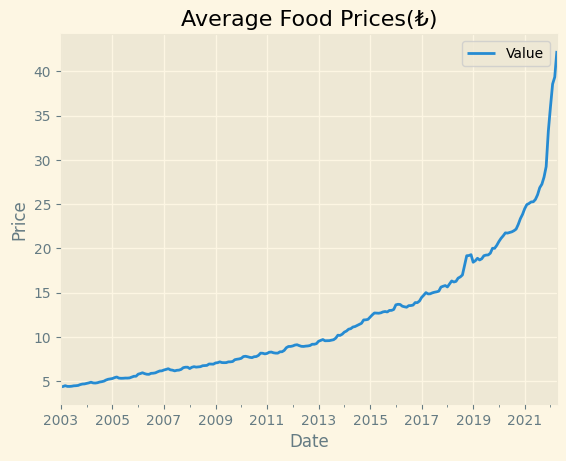

In [132]:
# Resulting Plot
df.plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Average Food Prices(₺)")

In [133]:
df.Value

TIME
2003-01-01     4.354066
2003-02-01     4.403930
2003-03-01     4.493635
2003-04-01     4.413601
2003-05-01     4.408923
                ...    
2021-12-01    33.217742
2022-01-01    35.982803
2022-02-01    38.563805
2022-03-01    39.355813
2022-04-01    42.303279
Name: Value, Length: 232, dtype: float64

In [134]:
# Test stationarity for model selection

from statsmodels.tsa.stattools import adfuller
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

testStationarity(df.Value)

Test Statistic                  -0.552569
p-value                          0.881343
#Lags Used                      12.000000
Number of Observations Used    219.000000
Critical Value (1%)             -3.460567
Critical Value (5%)             -2.874830
Critical Value (10%)            -2.573853
dtype: float64

For model selection we used adfuller test. Time series are stationary if they do not have trend or seasonal effects, otherwire considered as not-stationary. For not-stationary time series best fit SARIMAX model. 

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test.
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Null Hypothesis is failed to be rejected by Dickey-Fuller test and gave a result of Test statistical value -0.552569, which is higher than Critical value (10%). That is also indicated by p-value 0.881343 (p-value > 0.05), meaning, that out time series are not-stationary, having strong seasonal effects and we will fit SARIMAX model.

  

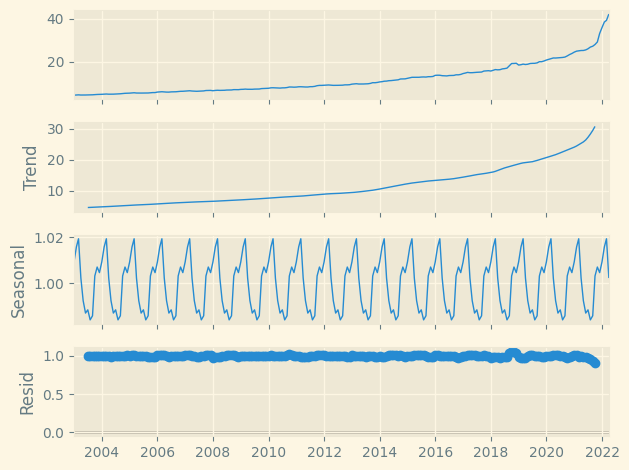

In [135]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')



plt.rc('lines', linewidth=1, color='r')

fig = result.plot()
#print(plt.style.available)

In [136]:
#Import Arima Model
from pmdarima.arima import auto_arima

results = auto_arima(df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=127.238, Time=0.56 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=240.186, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=142.588, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=191.334, Time=0.27 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=129.449, Time=0.17 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=126.115, Time=0.91 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=126.817, Time=0.44 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=128.066, Time=3.54 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=127.763, Time=5.42 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=129.234, Time=1.96 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=127.999, Time=1.20 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=126.270, Time=5.45 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=192.553, Time=0.58 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=142.752, Time=0.56 sec
 ARIMA(2,1,1)(1,1,1)[12]         

In [137]:
results.aic()

115.6501828073955

SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.Trend Elements: p- Trend autoregression order, d - Trend difference order, q - Trend moving average order. Seasonal Elements: P - Seasonal autoregressive order ,D - Seasonal difference order, Q - Seasonal moving average order and m - The number of time steps for a single seasonal period.

Together, the notation for an SARIMA model is specified as: SARIMA(p,d,q)(P,D,Q)m
               
We used Auto Arima for automaticly identifying best hyperparameters for the trend and seasonal elements. And  the Model perform best with lowest AIC of 2377.4812, using Trend Elements 1, 1, 1 and Seasonal Elements - - 0, 1, 0, where m - 12. Those hyperparameters we will fit into the SARIMAX.

In [138]:
#Import Sarima Model
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df.astype(float),
                                order=(3,1,2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()



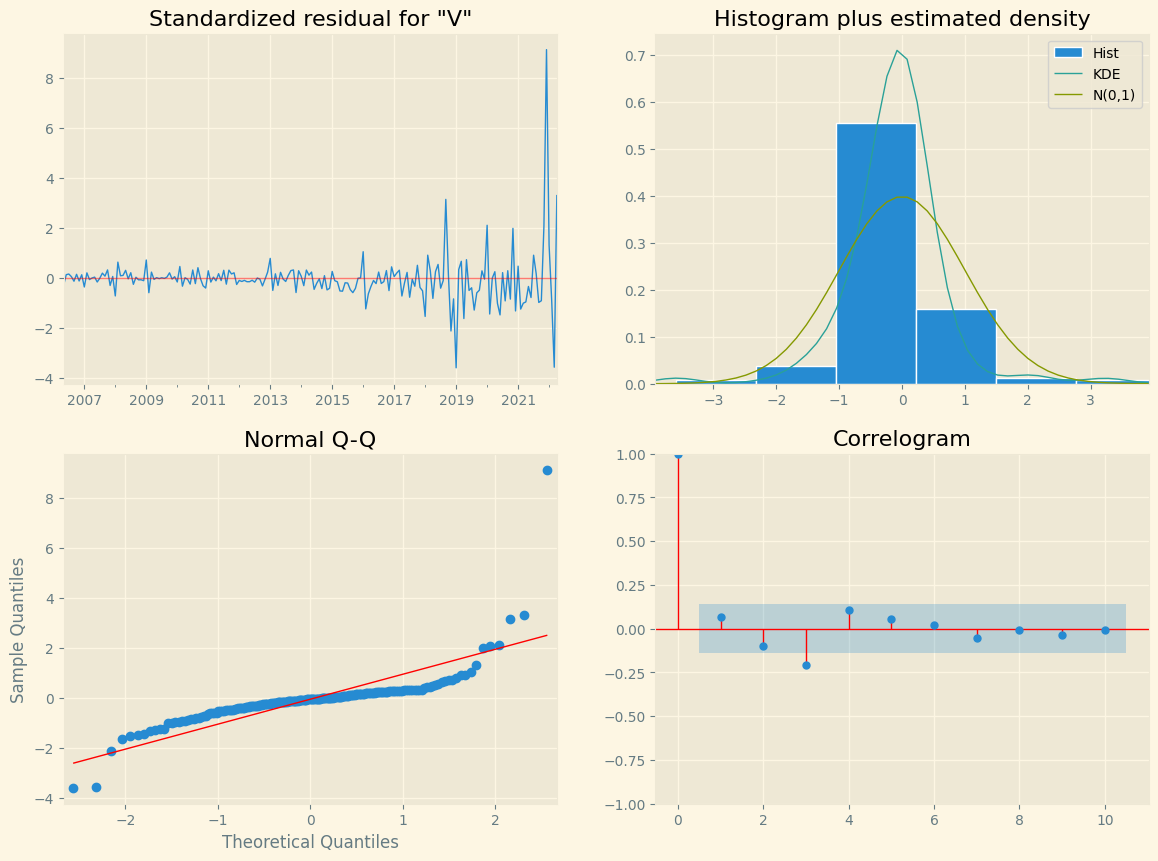

In [139]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

In [140]:
#Creating prediction 
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [141]:
#Creating Predicted Mean Values
pred_ci['Predicted'] = (pred_ci['lower Value'] + pred_ci['upper Value'])/2
pred_ci['Observed'] = df['Value']
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Value,upper Value,Predicted,Observed,"Diff, %%"
2021-07-01,25.205519,26.371515,25.788517,26.057374,-1.031790
2021-08-01,26.222617,27.388389,26.805503,26.855520,-0.186245
2021-09-01,26.958026,28.123788,27.540907,27.248159,1.074376
2021-10-01,27.736620,28.902176,28.319398,28.046824,0.971852
2021-11-01,28.043290,29.208834,28.626062,29.239670,-2.098543
2021-12-01,29.922777,31.088133,30.505455,33.217742,-8.165177
2022-01-01,35.010218,36.175560,35.592889,35.982803,-1.083612
2022-02-01,38.245693,39.410897,38.828295,38.563805,0.685852
2022-03-01,39.835584,41.000781,40.418183,39.355813,2.699396
2022-04-01,40.735590,41.900560,41.318075,42.303279,-2.328907


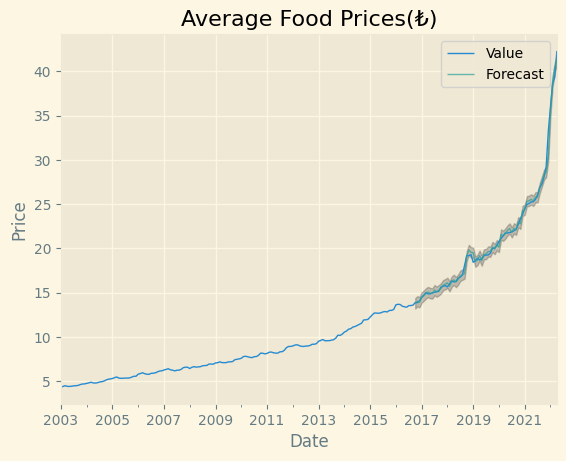

In [142]:
#Plotting value vs forecast
ax = df['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Average Food Prices(₺)")
plt.legend()
plt.show()

In [143]:
# Get forecast
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

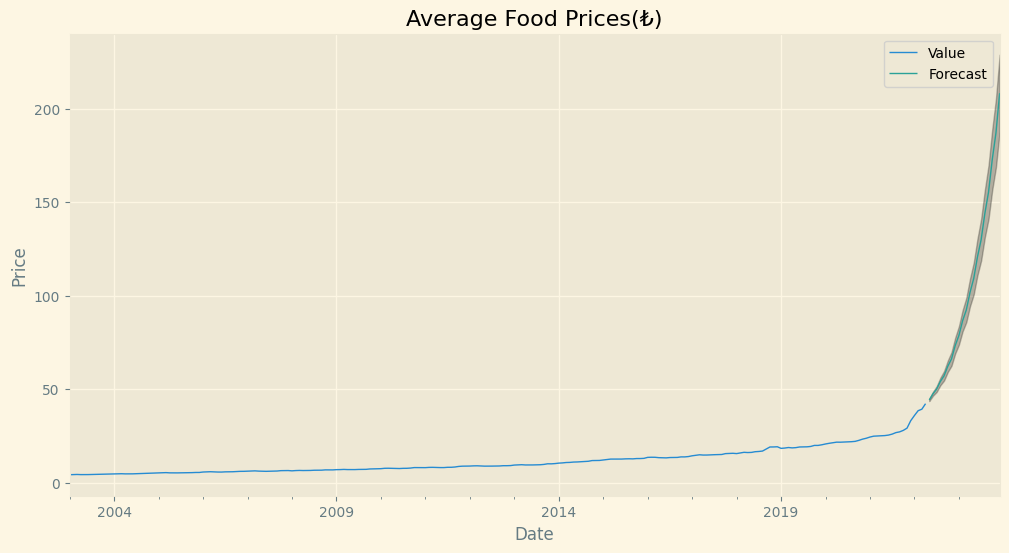

In [144]:
ax = df.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Average Food Prices(₺)")

plt.legend()

plt.show()

In [145]:
#Lower and upper values for prediction
pred_ci

,lower Value,upper Value
2022-05-01,43.709868,44.874830
2022-06-01,46.545522,48.635094
2022-07-01,48.561391,51.649959
2022-08-01,52.168076,56.201118
2022-09-01,54.671878,59.749740
2022-10-01,59.229056,65.345772
2022-11-01,62.550951,69.847670
2022-12-01,69.076300,77.581764
2023-01-01,73.789061,83.684517
2023-02-01,80.947532,92.290871


Text(0.5, 1.0, 'Average Food Prices(₺)')

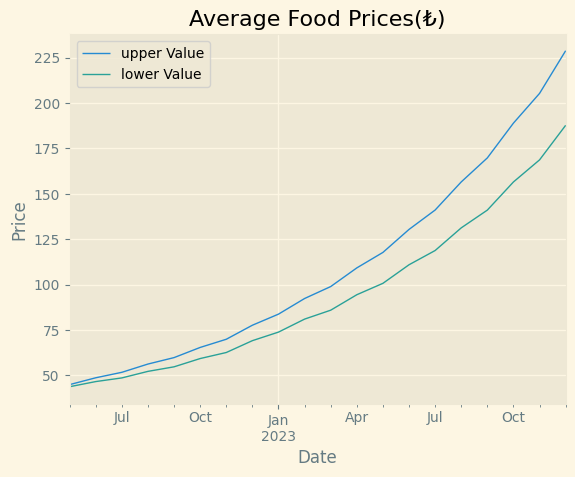

In [146]:
#Plotting upper and lower values
pred_ci[["upper Value","lower Value"]].head(24).plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Average Food Prices(₺)")

In [147]:
pred_ci['Mean'] = (pred_ci['lower Value'] + pred_ci['upper Value'])/2

In [148]:
pred_ci['Mean'].head(20)



2022-05-01     44.292349
2022-06-01     47.590308
2022-07-01     50.105675
2022-08-01     54.184597
2022-09-01     57.210809
2022-10-01     62.287414
2022-11-01     66.199310
2022-12-01     73.329032
2023-01-01     78.736789
2023-02-01     86.619202
2023-03-01     92.364021
2023-04-01    101.756067
2023-05-01    109.156395
2023-06-01    120.600987
2023-07-01    129.857850
2023-08-01    143.837043
2023-09-01    155.342389
2023-10-01    172.668835
2023-11-01    186.926925
2023-12-01    208.199913
Freq: MS, Name: Mean, dtype: float64

Text(0.5, 1.0, 'Average Food Prices(₺) Prediction for next 24 months')

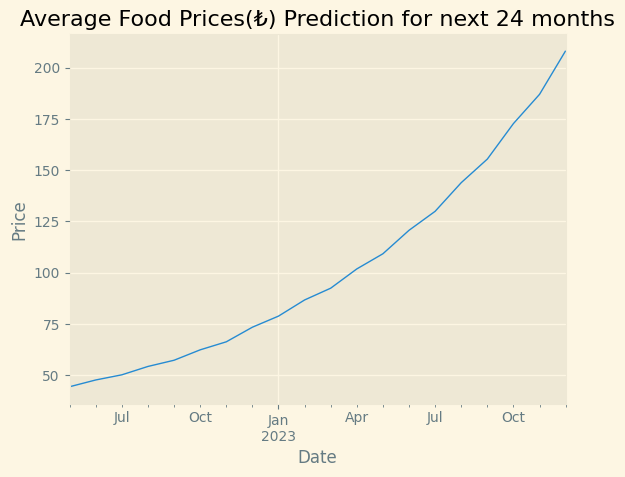

In [149]:
#Plotting predicted mean values
pred_ci["Mean"].plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Average Food Prices(₺) Prediction for next 24 months")

In [150]:
food_predicted=pred_ci["Mean"]

In [151]:
#Creating currency data
currency=pd.read_csv("./data/USD_TRY Geçmiş Verileri.csv")
currency=pd.DataFrame(currency["Şimdi"])
currency=currency.applymap(lambda x: str(x.replace(',','.')))
currency=currency.astype(float)
currency1=pd.DataFrame(currency.loc[:231])
currency1=currency.head(184)
currency1

,Şimdi
0,1.4065
1,1.4130
2,1.3920
3,1.3645
4,1.3175
...,...
179,13.3211
180,13.3209
181,13.8486
182,14.6739


In [152]:
from evds import evdsAPI
evds=evdsAPI('dsIC3fiGlu')
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-01-2007",enddate="30-04-2022",frequency=5)
usd.dropna(inplace=True)
usd

,Tarih,TP_DK_USD_S_YTL
0,2007-1,1.426660
1,2007-2,1.396940
2,2007-3,1.409632
3,2007-4,1.361815
4,2007-5,1.338283
...,...,...
179,2021-12,13.552861
180,2022-1,13.543614
181,2022-2,13.645665
182,2022-3,14.591843


In [153]:
#Creating currency time serie
df1=pd.DataFrame()
df1["Value"]=usd["TP_DK_USD_S_YTL"]
df1["TIME"]=pd.date_range(start="2007-01-01",end="2022-05-01",freq="1M")
df1['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df1['TIME'] =  pd.to_datetime(df1['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df1 = df1.set_index(['TIME'])
df1

,Value
TIME,
2007-01-31,1.426660
2007-02-28,1.396940
2007-03-31,1.409632
2007-04-30,1.361815
2007-05-31,1.338283
...,...
2021-12-31,13.552861
2022-01-31,13.543614
2022-02-28,13.645665


In [154]:
brent=pd.read_csv("./data/Brent Petrol Vadeli İşlemleri Geçmiş Verileri.csv")
brent=brent["Şimdi"]
brent=brent.str.replace(',','.')
brent=brent.astype(float)
brent1=pd.DataFrame(brent.loc[:231])
brent1

,Şimdi
0,31.10
1,32.79
2,27.18
3,23.68
4,26.32
...,...
227,77.35
228,89.26
229,97.97
230,104.71


In [155]:
#Creating brent petrol time serie
df2=pd.DataFrame()
df2["Value"]=brent1["Şimdi"]
df2["TIME"]=pd.date_range(start="2003-01-01",end="2022-05-01",freq="1M")
df2['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df2['TIME'] =  pd.to_datetime(df2['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df2 = df2.set_index(['TIME'])
df2=df2.tail(184)
df2


,Value
TIME,
2007-01-31,57.40
2007-02-28,61.89
2007-03-31,68.10
2007-04-30,67.65
2007-05-31,68.04
...,...
2021-12-31,77.35
2022-01-31,89.26
2022-02-28,97.97


In [156]:
#Creating Electricty price time serie
elektrik=data[data['Unnamed: 1']=='Elektrik Ücreti']
elektrik=elektrik.T
elektrik=elektrik.iloc[3:,:]
elektrik=elektrik.astype(float)
elektrik.iloc[0:24]=elektrik.iloc[0:24]/1e+6
elektrik

,206
Unnamed: 3,0.157838
Unnamed: 4,0.157838
Unnamed: 5,0.157589
Unnamed: 6,0.155600
Unnamed: 7,0.155600
...,...
Unnamed: 230,0.917200
Unnamed: 231,1.556200
Unnamed: 232,1.480900
Unnamed: 233,1.337200


In [157]:
df3=pd.DataFrame()
df3["Value"]=elektrik
df3["TIME"]=pd.date_range(start="2003-01-01",end="2022-05-01",freq="1M")
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3=df3.tail(184)
df3


,Value
TIME,
2007-01-31,0.1600
2007-02-28,0.1600
2007-03-31,0.1600
2007-04-30,0.1600
2007-05-31,0.1600
...,...
2021-12-31,0.9172
2022-01-31,1.5562
2022-02-28,1.4809


In [158]:
#Creating Natural Gas Price Time Serie
doğalgaz=data[data['Unnamed: 1']=='Doğalgaz Ücreti']
doğalgaz=doğalgaz.T
doğalgaz=doğalgaz.iloc[3:,:]
doğalgaz=doğalgaz.astype(float)
doğalgaz.iloc[0:24]=doğalgaz.iloc[0:24]/1e+6
doğalgaz

,207
Unnamed: 3,0.387655
Unnamed: 4,0.387773
Unnamed: 5,0.387773
Unnamed: 6,0.387593
Unnamed: 7,0.432088
...,...
Unnamed: 230,2.275700
Unnamed: 231,2.751500
Unnamed: 232,2.841100
Unnamed: 233,2.907100


In [159]:
motorin=data[data['Unnamed: 1']=='Motorin']
motorin=motorin.T
motorin=motorin.iloc[3:,:]
motorin=motorin.astype(float)
motorin.iloc[0:24]=motorin.iloc[0:24]/1e+6
motorin=motorin.set_index(pd.date_range(start="2003-01-01",end="2022-05-01",freq="1M"))
motorin.columns=["Motorin"]
motorin=motorin.tail(184)
motorin

,Motorin
2007-01-31,2.1300
2007-02-28,2.1500
2007-03-31,2.2100
2007-04-30,2.2600
2007-05-31,2.2600
...,...
2021-12-31,10.6783
2022-01-31,13.8452
2022-02-28,15.5104
2022-03-31,20.5784


In [160]:
df4=pd.DataFrame()
df4["Value"]=doğalgaz
df4["TIME"]=pd.date_range(start="2003-01-01",end="2022-05-01",freq="1M")
df4['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df4['TIME'] =  pd.to_datetime(df4['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df4 = df4.set_index(['TIME'])
df4=df4.tail(184)
df4

,Value
TIME,
2007-01-31,0.6100
2007-02-28,0.6100
2007-03-31,0.6100
2007-04-30,0.6100
2007-05-31,0.6100
...,...
2021-12-31,2.2757
2022-01-31,2.7515
2022-02-28,2.8411


In [161]:
df=df.tail(184)
df=df.set_index(pd.date_range(start="2007-01-01",end="2022-05-01",freq="1M"))
df

,Value
2007-01-31,6.266727
2007-02-28,6.331727
2007-03-31,6.410273
2007-04-30,6.283273
2007-05-31,6.245364
...,...
2021-12-31,33.217742
2022-01-31,35.982803
2022-02-28,38.563805
2022-03-31,39.355813


## Fitting regression model with current prices

In [162]:
from sklearn.model_selection import train_test_split 
y=df["Value"]
x1=pd.DataFrame(df1["Value"])
x2=pd.DataFrame(motorin["Motorin"])
x3=pd.DataFrame(df3["Value"])
x4=pd.DataFrame(df4["Value"])
X=pd.concat([x1,x2,x3,x4],axis=1)
const=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(const,y , 
                                   random_state=104,  
                                   test_size=0.1,  
                                   shuffle=True)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2116.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          2.40e-137
Time:                        17:37:15   Log-Likelihood:                -230.96
No. Observations:                 165   AIC:                             471.9
Df Residuals:                     160   BIC:                             487.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3057      0.322      7.157      0.0

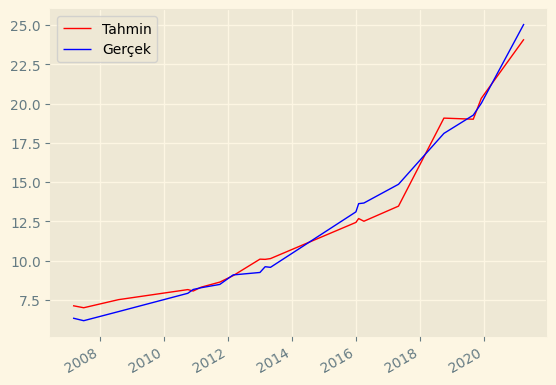

In [163]:
tahmin=pd.DataFrame()
tahmin["Tahmin"]=model.predict(X_test)
tahmin["Gerçek"]=y_test
tahmin=tahmin.sort_index()
tahmin.plot(color=["red","blue"])
plt.legend()
